# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Check if the response contains the necessary data
        if response["cod"] != 200:
            print(f"City {city} not found. Skipping...")
            continue

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City {city} not found. Skipping... {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(0.5)  # Reduced sleep time to 0.5 seconds

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
City hermanus not found. Skipping...
Processing Record 2 of Set 1 | panaba
City panaba not found. Skipping...
Processing Record 3 of Set 1 | bethel
City bethel not found. Skipping...
Processing Record 4 of Set 1 | hammerfest
City hammerfest not found. Skipping...
Processing Record 5 of Set 1 | qaqortoq
City qaqortoq not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
City ushuaia not found. Skipping...
Processing Record 7 of Set 1 | adamstown
City adamstown not found. Skipping...
Processing Record 8 of Set 1 | khovd
City khovd not found. Skipping...
Processing Record 9 of Set 1 | port-aux-francais
City port-aux-francais not found. Skipping...
Processing Record 10 of Set 1 | waitangi
City waitangi not found. Skipping...
Processing Record 11 of Set 1 | conception bay south
City conception bay south not found. Skipping...
Processing Record 12 of Set 1 | luanda
City luanda not foun

KeyboardInterrupt: 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'city_data' is not defined

In [10]:
# Display sample data
city_data_df.head()

NameError: name 'city_data_df' is not defined

In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

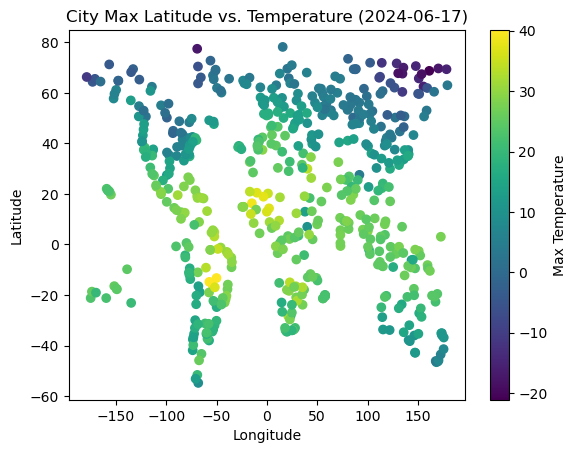

In [38]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.scatter(city_data_df['Lng'],city_data_df['Lat'],c=city_data_df['Max Temp'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
clb.set_label("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

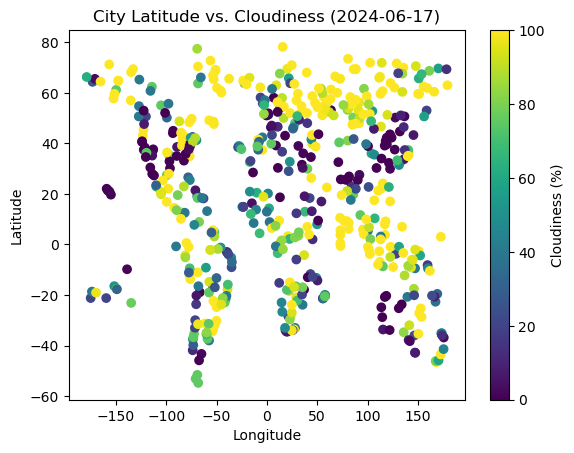

In [90]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df['Lng'],city_data_df['Lat'],c=city_data_df['Cloudiness'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
clb.set_label("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

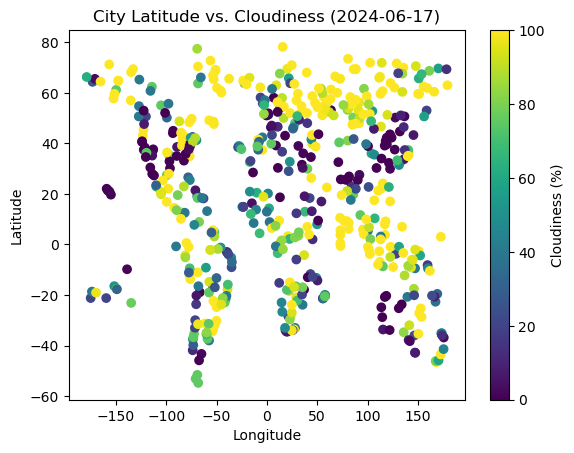

In [86]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df['Lng'],city_data_df['Lat'],c=city_data_df['Cloudiness'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
clb.set_label("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

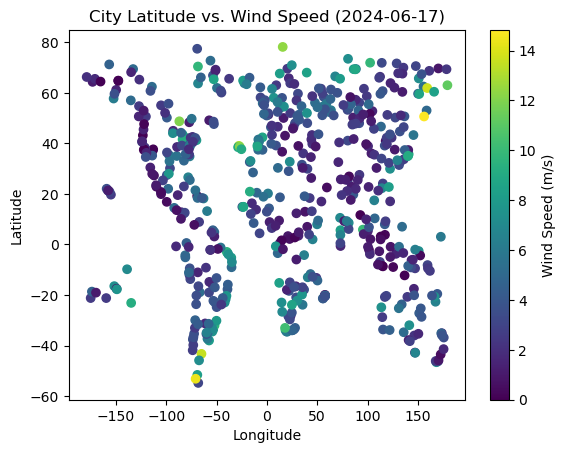

In [88]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.scatter(city_data_df['Lng'],city_data_df['Lat'],c=city_data_df['Wind Speed'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
clb.set_label("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title, hemisphere, save_fig=False):
    # Linear regression variables
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    
    # Calculation of regression line
    regression_line_values = x * slope + intercept
    regression_line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}"
    
    # Scatter plot
    plt.scatter(x, y)
    plt.plot(x, regression_line_values, "r-", label="Regression Line")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{hemisphere} Hemisphere: {title}")
    plt.legend()
    
    # Notation for regression equation and slope value
    plt.annotate(regression_line_eq, (min(x), min(y)), fontsize=12, color="red", ha="left", va="bottom")
    
    # Show plot
    plt.show()
    
    print(f'The r^2-value is: {rvalue**2:.4f}')

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

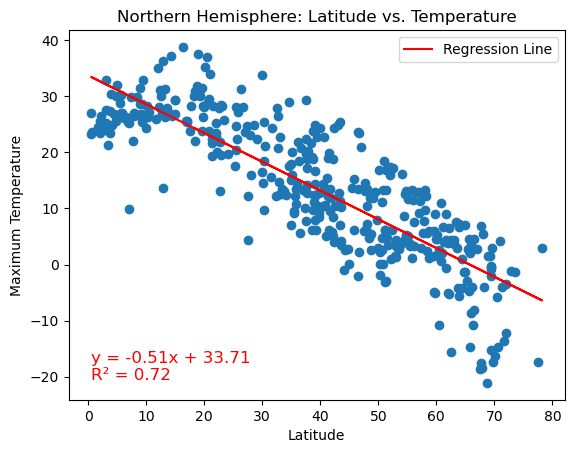

The r^2-value is: 0.7161


In [83]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude",
                       "Maximum Temperature", "Latitude vs. Temperature", "Northern", save_fig=True)

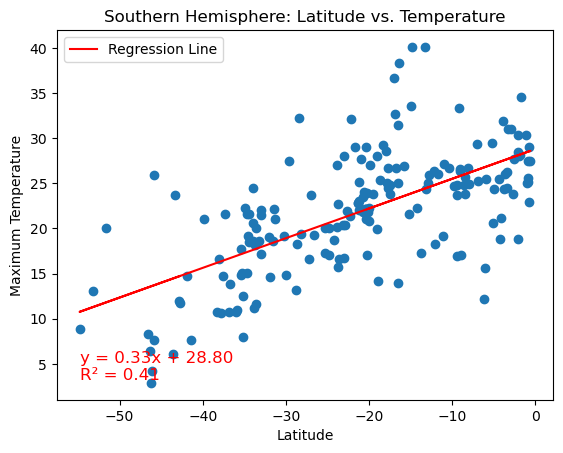

The r^2-value is: 0.4121


In [81]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude",
                       "Maximum Temperature", "Latitude vs. Temperature", "Southern", save_fig=True)

**Discussion about the linear relationship:** In the northern hemisphere data both visually with a tighter cluster of points around the regression line and with the R squared value that in the norther hemisphere a stronger dependance is observed between the temperature and the latitude compared to the the plot and R squared value that we get in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

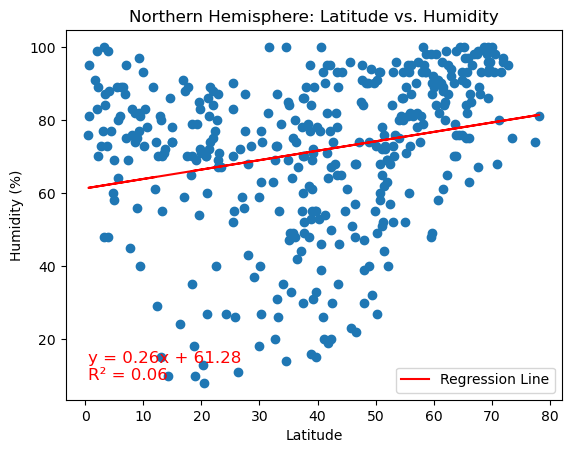

The r^2-value is: 0.0569


In [75]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", 
                       "Humidity (%)", "Latitude vs. Humidity", "Northern", save_fig=True)

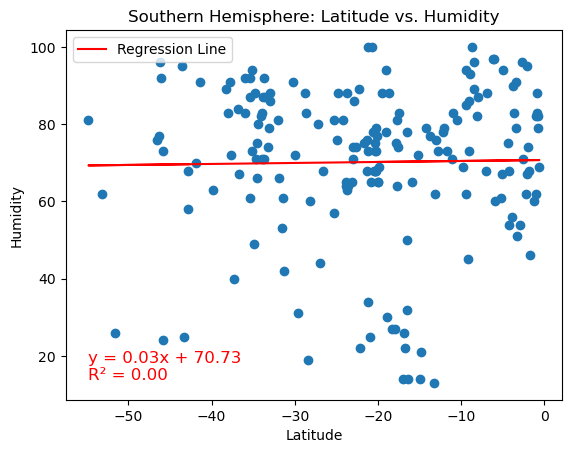

The r^2-value is: 0.0003


In [100]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       "Latitude", "Humidity", "Latitude vs. Humidity", "Southern", save_fig=True)

**Discussion about the linear relationship:** The points in the plot are not clusttered at all around the regression lines on both plots and we observe on both that the resulting R squared is at or near 0, indicating no dependence of Humidity on latitude

### Cloudiness vs. Latitude Linear Regression Plot

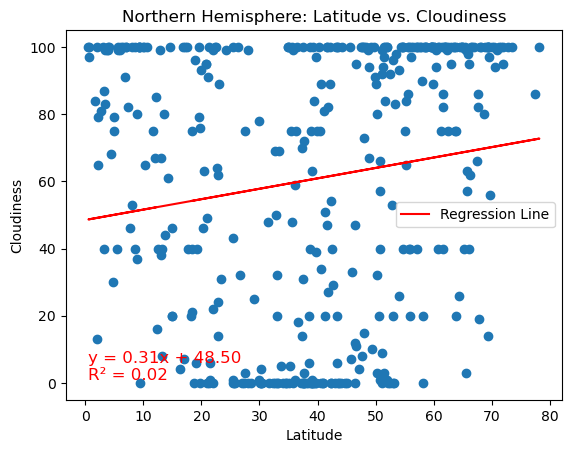

The r^2-value is: 0.0240


In [92]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", 
                       "Cloudiness", "Latitude vs. Cloudiness", "Northern", save_fig=True)

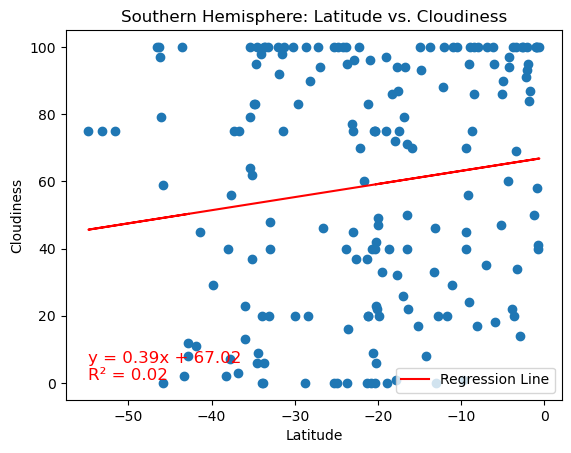

The r^2-value is: 0.0206


In [94]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness",
                       "Latitude vs. Cloudiness", "Southern", save_fig=True)

**Discussion about the linear relationship:** Once again the result is the same as the plots of humidity's dependance on latitude, where we find no dependece in this case of cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

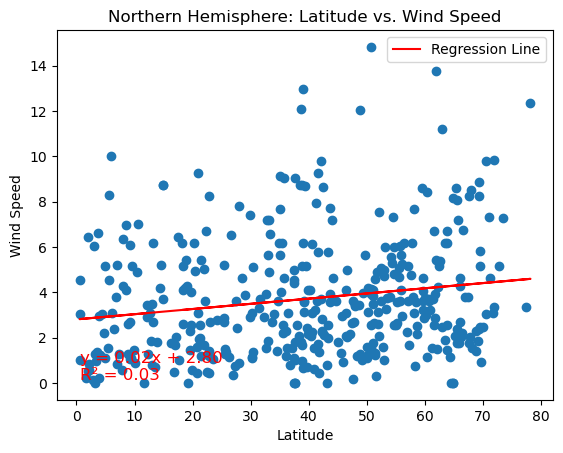

The r^2-value is: 0.0304


In [96]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", "Latitude vs. Wind Speed", "Northern", save_fig=True)

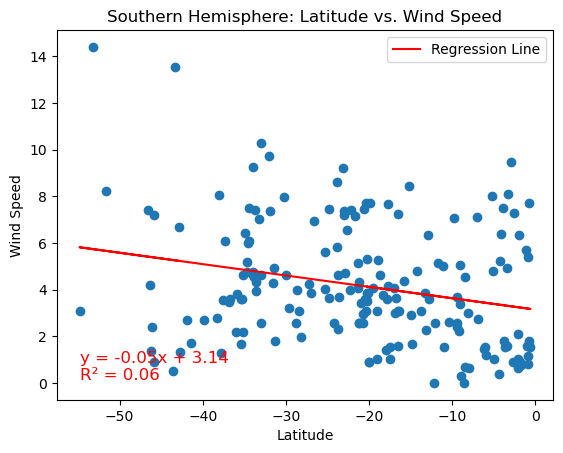

The r^2-value is: 0.0622


In [98]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", "Latitude vs. Wind Speed", "Southern", save_fig=True)

**Discussion about the linear relationship:** As for the final plots in wind speed, both with a visual analysis of the lack of clusttered points around the line almost completely and the near 0 R squared value wind speed also has no dependence on latitude.
